In [1]:
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'
model_path='weights/icon_detect/model.pt'

som_model = get_yolo_model(model_path)

som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [2]:
# two choices for caption model: fine-tuned blip2 or florence2
import importlib
# import util.utils
# importlib.reload(utils)
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



/mnt/weka/home/shicheng.wen/miniforge3/envs/omni/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [4]:
# reload utils
import importlib
import util.utils as utils
importlib.reload(utils)
# from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time() 


image size: (1919, 1079)


/mnt/weka/home/shicheng.wen/miniforge3/envs/omni/lib/python3.12/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Checking connectivity to the model hosters, this may take a while. To bypass this check, set `PADDLE_PDX_DISABLE_MODEL_SOURCE_CHECK` to `True`.
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/mnt/weka/home/shicheng.wen/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/mnt/weka/home/shicheng.wen/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already ex


0: 736x1280 115 icons, 81.9ms
Speed: 12.6ms preprocess, 81.9ms inference, 113.2ms postprocess per image at shape (1, 3, 736, 1280)
no ocr bbox!!!
len(filtered_boxes): 114 0


/mnt/weka/home/shicheng.wen/miniforge3/envs/omni/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:677: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


time to get parsed content: 1.846456527709961


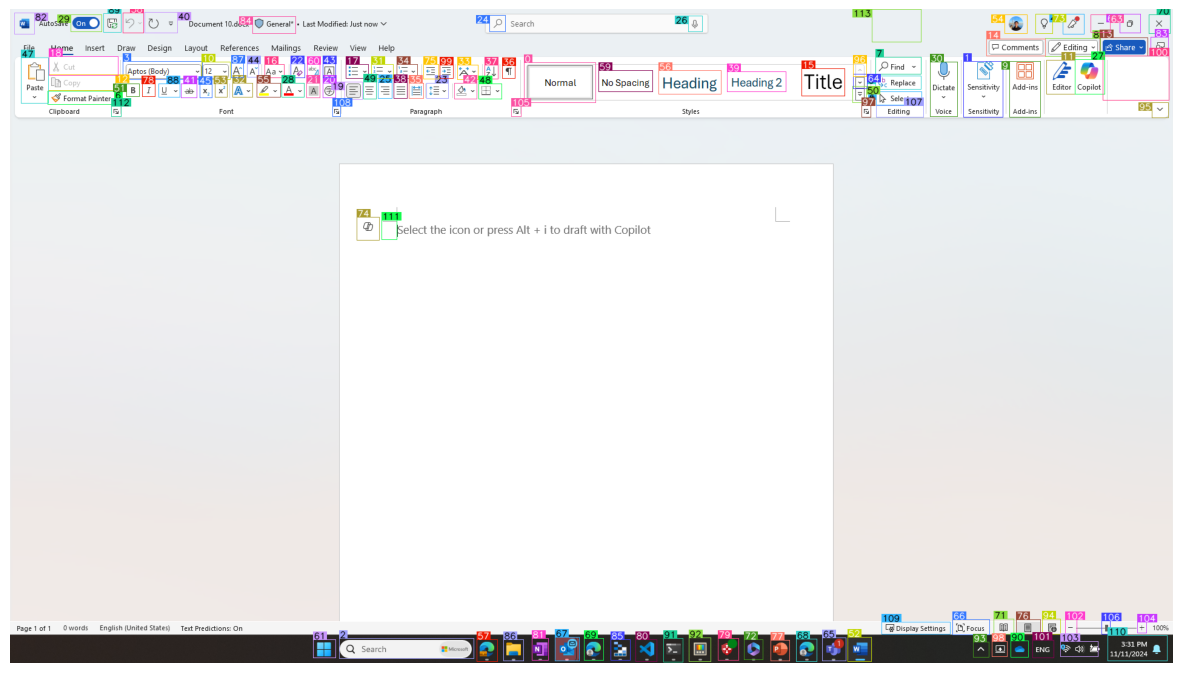

In [5]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
# print(len(parsed_content_list))

In [6]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,ID
0,icon,"[0.442173570394516, 0.08184662461280823, 0.503...",True,Normal,0
1,icon,"[0.8202134370803833, 0.0799441710114479, 0.853...",True,Sensibility Sensibility,1
2,icon,"[0.28298962116241455, 0.9624111652374268, 0.39...",True,a note-taking application.,2
3,icon,"[0.09709586203098297, 0.07982233911752701, 0.1...",True,A text box for a text editor or document.,3
4,icon,"[0.74495530128479, 0.12651561200618744, 0.7839...",True,Select TV,4
...,...,...,...,...,...
109,icon,"[0.7498579621315002, 0.9372038841247559, 0.808...",True,Center,109
110,icon,"[0.943857729434967, 0.9580957293510437, 0.9950...",True,"11,11,024",110
111,icon,"[0.3195081055164337, 0.32292047142982483, 0.33...",True,a blank space.,111
112,icon,"[0.08737719804048538, 0.14849404990673065, 0.0...",True,Paragraph Options,112


In [7]:
parsed_content_list

[{'type': 'icon',
  'bbox': [0.442173570394516,
   0.08184662461280823,
   0.5035442113876343,
   0.1431264728307724],
  'interactivity': True,
  'content': 'Normal'},
 {'type': 'icon',
  'bbox': [0.8202134370803833,
   0.0799441710114479,
   0.8537705540657043,
   0.16541637480258942],
  'interactivity': True,
  'content': 'Sensibility Sensibility'},
 {'type': 'icon',
  'bbox': [0.28298962116241455,
   0.9624111652374268,
   0.39879798889160156,
   0.993495523929596],
  'interactivity': True,
  'content': 'a note-taking application.'},
 {'type': 'icon',
  'bbox': [0.09709586203098297,
   0.07982233911752701,
   0.1656084507703781,
   0.10813643038272858],
  'interactivity': True,
  'content': 'A text box for a text editor or document.'},
 {'type': 'icon',
  'bbox': [0.74495530128479,
   0.12651561200618744,
   0.7839283347129822,
   0.14661851525306702],
  'interactivity': True,
  'content': 'Select TV'},
 {'type': 'icon',
  'bbox': [0.7444301843643188,
   0.10262974351644516,
   0.78

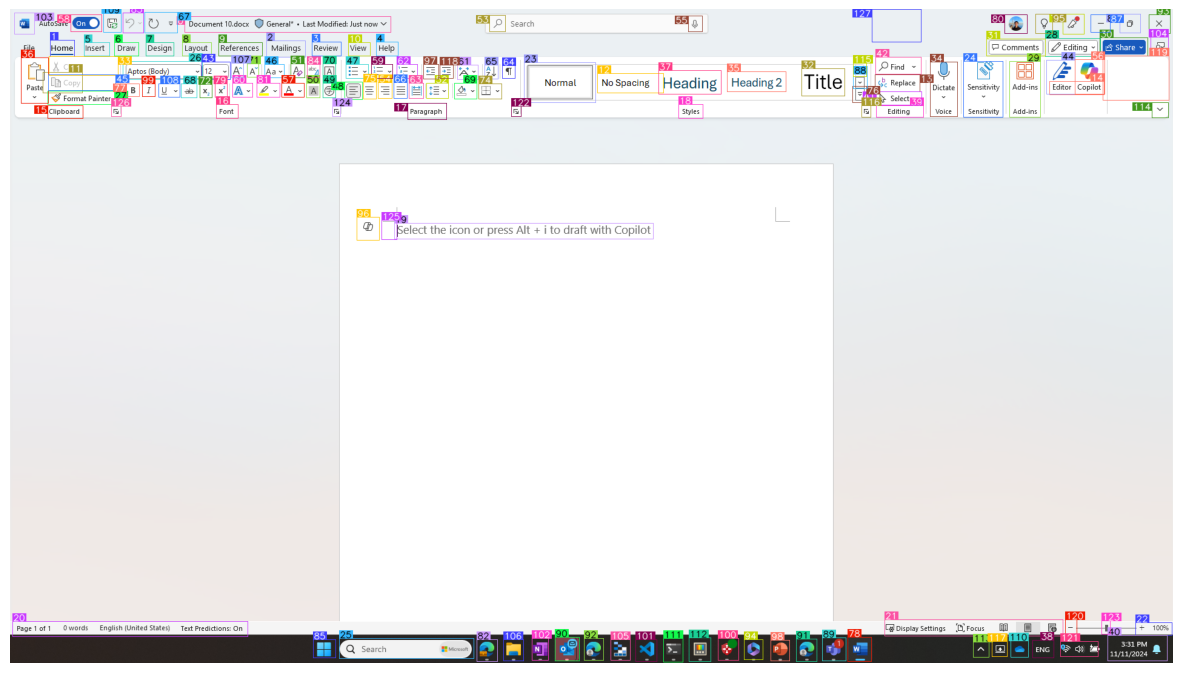

In [13]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
# print(len(parsed_content_list))


In [14]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,source,ID
0,text,"[0.1500781625509262, 0.011121409013867378, 0.3...",False,Document 10.docx General* Last Modified: Jus...,box_ocr_content_ocr,0
1,text,"[0.034392911940813065, 0.04726598784327507, 0....",False,Home,box_ocr_content_ocr,1
2,text,"[0.22094841301441193, 0.048192769289016724, 0....",False,Mailings,box_ocr_content_ocr,2
3,text,"[0.2595101594924927, 0.05004633963108063, 0.28...",False,Review,box_ocr_content_ocr,3
4,text,"[0.31474727392196655, 0.05004633963108063, 0.3...",False,Help,box_ocr_content_ocr,4
...,...,...,...,...,...,...
123,icon,"[0.9390129446983337, 0.9358046650886536, 0.946...",True,Adding a new item or element.,box_yolo_content_yolo,123
124,icon,"[0.27768561244010925, 0.14850999414920807, 0.2...",True,Paragraph Options,box_yolo_content_yolo,124
125,icon,"[0.3195086717605591, 0.3229200839996338, 0.332...",True,a blank space.,box_yolo_content_yolo,125
126,icon,"[0.08737725764513016, 0.14849473536014557, 0.0...",True,Paragraph Options,box_yolo_content_yolo,126


In [15]:
parsed_content_list

[{'type': 'text',
  'bbox': [0.1500781625509262,
   0.011121409013867378,
   0.3272537887096405,
   0.03521779552102089],
  'interactivity': False,
  'content': 'Document 10.docx  General*  Last Modified: Just now ',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.034392911940813065,
   0.04726598784327507,
   0.05523710325360298,
   0.07228915393352509],
  'interactivity': False,
  'content': 'Home',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.22094841301441193,
   0.048192769289016724,
   0.2542991042137146,
   0.07321593910455704],
  'interactivity': False,
  'content': 'Mailings',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.2595101594924927,
   0.05004633963108063,
   0.2845231890678406,
   0.07136237621307373],
  'interactivity': False,
  'content': 'Review',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.31474727392196655,
   0.05004633963108063,
   0.3335070312023163,
   0.07136237621307373],
  